## Data directory structure labeling stuff

Dataset downloaded from: https://www.kaggle.com/salmaneunus/rock-classification

modifying to get rid of subtype folders--e.g. basalt, granite--now only have 3 folders, 1 for each class; ***only do once***


*Original structure:*

Dataset (root dir)
  * Igneous
    * Basalt
    * Granite
  * Metamorphic
    * Marble
    * Quartzite
  * Sedimentary
    * Coal
    * Limestone
    * Sandstone

*After running the code cell below:*

Dataset (root dir)
  * Igneous
  * Metamorphic
  * Sedimentary


In [ ]:
%%shell
cd content/MyDrive/Dataset

for file in */*/*; do mv "$file" $(dirname "$file")/"$(basename ${file%/*})"_"$(basename "$file")"; done
for class in *; do mv $class/*/* $class; done
for dir in */*/; do rm -d $dir; done   

ls Igneous | wc -l # should be 187
ls Metamorphic | wc -l # should be 864
ls Sedimentary | wc -l # should be 1032

/bin/bash: line 0: cd: content/MyDrive/Dataset: No such file or directory
basename: extra operand ‘sample_data/california_housing_train.csv’
Try 'basename --help' for more information.
mv: cannot stat '*/*/*': No such file or directory
mv: cannot stat 'sample_data/*/*': No such file or directory
rm: cannot remove '*/*/': No such file or directory
ls: cannot access 'Igneous': No such file or directory
0
ls: cannot access 'Metamorphic': No such file or directory
0
ls: cannot access 'Sedimentary': No such file or directory
0


## Imports and Drive stuff

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms
from torchvision.models.alexnet import AlexNet
from torchvision.models import googlenet
import torch.optim as torch_optim
import torch.nn as nn
import torch.nn.functional as F

from google.colab import drive
drive.mount('content/', force_remount = True)
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')


Mounted at content/


In [ ]:
!pip install fastbook --upgrade
import fastai
print(fastai.__version__)
from fastai.vision.all import *
from IPython.core.pylabtools import figsize

     |████████████████████████████████| 719 kB 23.6 MB/s 
     |████████████████████████████████| 197 kB 60.1 MB/s 
     |████████████████████████████████| 1.2 MB 62.7 MB/s 
     |████████████████████████████████| 60 kB 9.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
2.6.3


## Image File path stuff

In [ ]:
root_dir="/content/content/MyDrive/Dataset"
path=Path(root_dir)
path.ls()
files=get_image_files(path)
len(files)

2069

In [ ]:
Tpath=Path("/content/content/MyDrive/Dataset/Igneous")
Tpath.ls()
Tfiles=get_image_files(Tpath)
print(f"\n {len(Tfiles)} Igneous")

Tpath=Path("/content/content/MyDrive/Dataset/Metamorphic")
Tpath.ls()
Tfiles=get_image_files(Tpath)
print(f"\n {len(Tfiles)} Metamorphic")

Tpath=Path("/content/content/MyDrive/Dataset/Sedimentary")
Tpath.ls()
Tfiles=get_image_files(Tpath)
print(f"\n {len(Tfiles)} Sedimentary")



 187 Igneous

 859 Metamorphic

 1023 Sedimentary


187 + 859 + 1023 = 2069 

In [ ]:
test_dir="/content/content/MyDrive/test_set"
imgs = get_image_files(Path(test_dir))
print(len(imgs))
test_data = []
get_class = lambda i: os.path.dirname(i).split("/")[-1]
get_subtype = lambda i: os.path.basename(i).split("_")[0]
for img in imgs:
    test_data.append((img, get_class(img), get_subtype(img)))

45


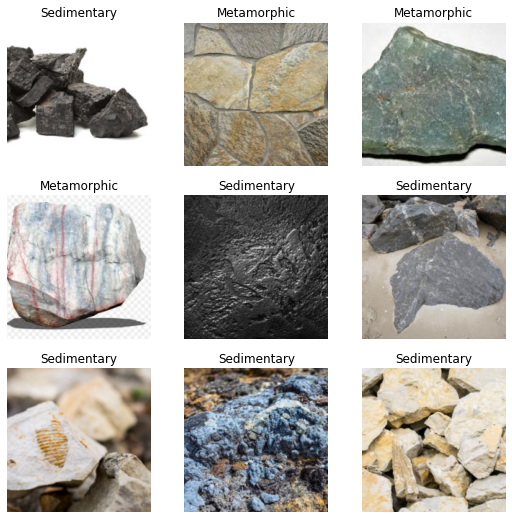

In [ ]:
def get_dls(bs):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(200))
    return dblock.dataloaders(path, bs=bs)
dls = get_dls(32)
dls.show_batch()

# Googlenet, accuracy = 95%

In [ ]:
def get_dls(size, bs):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(200),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.66),
                               Normalize])
    return dblock.dataloaders(path, bs=bs)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


epoch,train_loss,valid_loss,accuracy,time
0,1.563158,1.419813,0.663438,03:34


Better model found at epoch 0 with accuracy value: 0.6634382605552673.


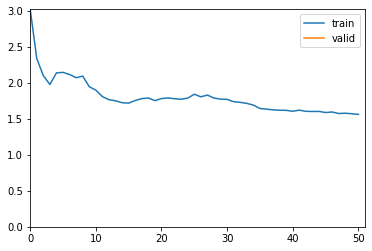

epoch,train_loss,valid_loss,accuracy,time
0,0.895208,0.880789,0.682809,04:27
1,0.804631,0.999221,0.680387,04:23
2,0.759086,0.734582,0.697337,04:25
3,0.643026,0.858013,0.736077,04:21
4,0.555276,0.641971,0.779661,04:23
5,0.455347,0.677205,0.782082,04:25
6,0.360439,0.606532,0.789346,04:22
7,0.313709,0.626345,0.794189,04:29


Better model found at epoch 0 with accuracy value: 0.6828086972236633.


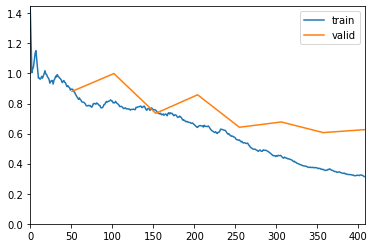

Better model found at epoch 2 with accuracy value: 0.6973365545272827.
Better model found at epoch 3 with accuracy value: 0.7360774874687195.
Better model found at epoch 4 with accuracy value: 0.7796609997749329.
Better model found at epoch 5 with accuracy value: 0.7820823192596436.
Better model found at epoch 6 with accuracy value: 0.7893462181091309.
Better model found at epoch 7 with accuracy value: 0.7941888570785522.


Path('models/g1.pth')

In [ ]:
model = googlenet
learn=vision_learner(get_dls(150, 32), model, metrics=accuracy)
learn.fine_tune(8, 0.02, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('g1')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


epoch,train_loss,valid_loss,accuracy,time
0,0.399658,0.527331,0.820823,05:00


Better model found at epoch 0 with accuracy value: 0.8208232522010803.


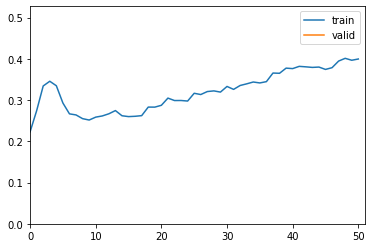

epoch,train_loss,valid_loss,accuracy,time
0,0.309346,0.405259,0.849879,06:13
1,0.358196,0.407098,0.854722,06:13
2,0.299942,0.393226,0.857143,06:16
3,0.273140,0.389991,0.852300,06:18


Better model found at epoch 0 with accuracy value: 0.8498789072036743.


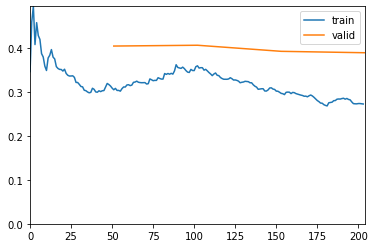

Better model found at epoch 1 with accuracy value: 0.8547215461730957.
Better model found at epoch 2 with accuracy value: 0.8571428656578064.


Path('models/g2.pth')

In [ ]:
learn=vision_learner(get_dls(180, 32), model, metrics=accuracy).load('g1')
learn.fine_tune(4, 0.01, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('g2')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


epoch,train_loss,valid_loss,accuracy,time
0,0.337756,0.139226,0.958838,05:16


Better model found at epoch 0 with accuracy value: 0.9588377475738525.


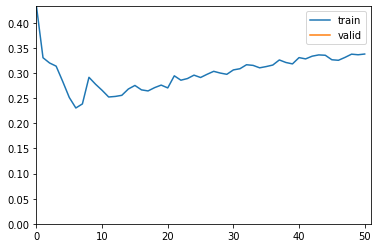

epoch,train_loss,valid_loss,accuracy,time
0,0.288186,0.138729,0.946731,06:41
1,0.278827,0.153938,0.949153,06:35


Better model found at epoch 0 with accuracy value: 0.9467312097549438.


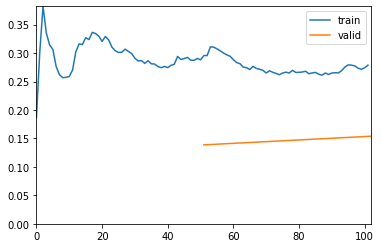

Better model found at epoch 1 with accuracy value: 0.9491525292396545.


Path('models/g3.pth')

In [ ]:
learn=vision_learner(get_dls(190, 32), model, metrics=accuracy).load('g2')
learn.fine_tune(2, 0.005, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('g3')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


              precision    recall  f1-score   support

     Igneous       0.89      0.77      0.83        31
 Metamorphic       0.99      0.92      0.96       165
 Sedimentary       0.93      1.00      0.96       217

    accuracy                           0.95       413
   macro avg       0.94      0.90      0.91       413
weighted avg       0.95      0.95      0.95       413



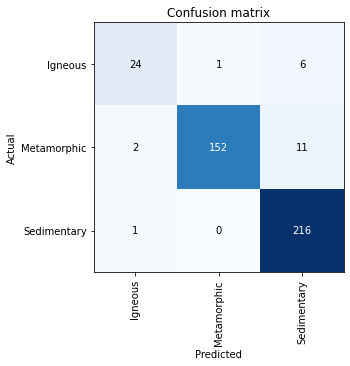

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize(5,5))
interp.print_classification_report()

In [ ]:
learn.export('/content/content/MyDrive/models/googlenet-1')

# resnet18, accuracy = 95.1%

In [ ]:
def get_dls(size, bs):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(200),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.8),
                               Normalize])
    return dblock.dataloaders(path, bs=bs)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.446975,1.224292,0.598063,07:22
1,1.174736,0.949504,0.656174,00:22
2,1.052789,1.435172,0.636804,00:22
3,1.010651,0.982159,0.653753,00:22
4,0.902775,0.927553,0.653753,00:22
5,0.823915,1.015623,0.573850,00:22
6,0.714532,0.958393,0.644068,00:24
7,0.656066,0.679828,0.704601,00:22
8,0.591750,0.621055,0.736077,00:22
9,0.525604,0.640221,0.736077,00:23


Better model found at epoch 0 with accuracy value: 0.5980629324913025.


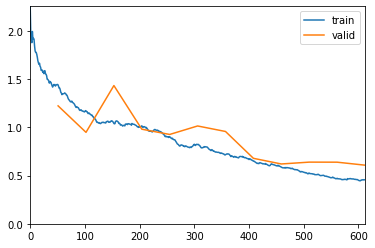

Better model found at epoch 1 with accuracy value: 0.65617436170578.
Better model found at epoch 7 with accuracy value: 0.7046005129814148.
Better model found at epoch 8 with accuracy value: 0.7360774874687195.


In [ ]:
model = resnet18
learn=vision_learner(get_dls(90, 32), model, metrics=accuracy)
learn.fit_one_cycle(12, 0.014, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])

In [ ]:
learn.save('r1')

Path('models/r1.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.518740,0.531002,0.791768,00:22
1,0.520074,0.605004,0.736077,00:22
2,0.497608,0.631143,0.748184,00:22
3,0.478336,0.470780,0.823245,00:22
4,0.461520,0.481530,0.811138,00:22
5,0.409499,0.481843,0.806295,00:22
6,0.382460,0.491682,0.813559,00:22
7,0.335258,0.486432,0.820823,00:22


Better model found at epoch 0 with accuracy value: 0.7917675375938416.


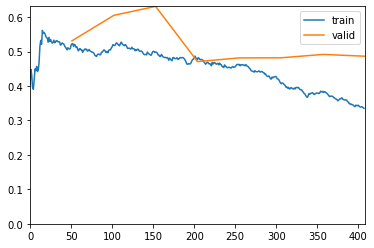

Better model found at epoch 3 with accuracy value: 0.823244571685791.


In [ ]:
learn=vision_learner(get_dls(110, 32), model, metrics=accuracy).load('r1')
learn.fit_one_cycle(8, 0.004, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])

In [ ]:
learn.save('r2')

Path('models/r2.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.416166,0.351658,0.874092,00:22
1,0.387774,0.364846,0.845036,00:21
2,0.374947,0.363614,0.861985,00:21
3,0.360295,0.383635,0.854722,00:22
4,0.346763,0.350218,0.866828,00:21
5,0.336046,0.351696,0.857143,00:22
6,0.324877,0.348075,0.859564,00:21
7,0.313568,0.347741,0.854722,00:21


Better model found at epoch 0 with accuracy value: 0.8740919828414917.


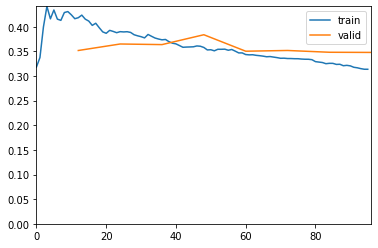

In [ ]:
learn=vision_learner(get_dls(140, 128), model, metrics=accuracy).load('r2')
learn.fit_one_cycle(8,0.004, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')] )

In [ ]:
learn.save('r3')

Path('models/r3.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.383008,0.339607,0.881356,00:21


Better model found at epoch 0 with accuracy value: 0.8813559412956238.


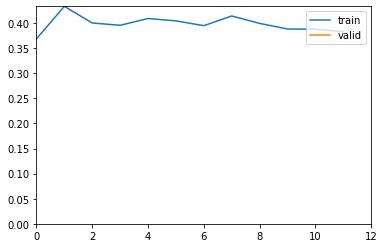

epoch,train_loss,valid_loss,accuracy,time
0,0.403971,0.425047,0.835351,00:21
1,0.364631,0.413407,0.847458,00:22
2,0.333403,0.459883,0.859564,00:22
3,0.305941,0.384539,0.874092,00:22
4,0.268398,0.392031,0.857143,00:21
5,0.244985,0.398440,0.859564,00:22


Better model found at epoch 0 with accuracy value: 0.8353511095046997.


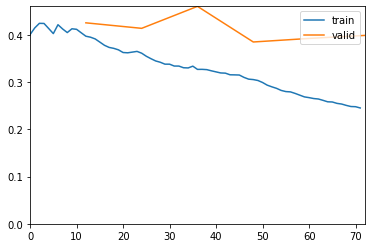

Better model found at epoch 1 with accuracy value: 0.8474576473236084.
Better model found at epoch 2 with accuracy value: 0.8595641851425171.
Better model found at epoch 3 with accuracy value: 0.8740919828414917.


In [ ]:
learn=vision_learner(get_dls(160, 128), model, metrics=accuracy).load('r3')
learn.fine_tune(6, 0.005, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])

In [ ]:
learn.save('r4')

Path('models/r4.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.300287,0.274303,0.903148,00:21
1,0.289120,0.255289,0.917676,00:21
2,0.274533,0.310561,0.874092,00:21
3,0.260211,0.351485,0.876513,00:21
4,0.241552,0.303530,0.895884,00:21


Better model found at epoch 0 with accuracy value: 0.9031476974487305.


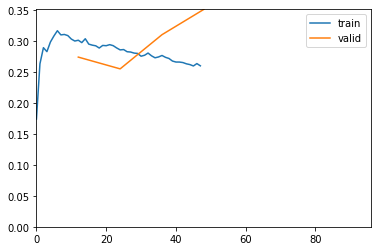

Better model found at epoch 1 with accuracy value: 0.9176755547523499.
No improvement since epoch 1: early stopping


In [ ]:
learn=vision_learner(get_dls(120, 128), model, metrics=accuracy).load('r4')
learn.fit_one_cycle(8, 0.006, cbs=[ShowGraphCallback, EarlyStoppingCallback('accuracy', min_delta=0.005, patience=3), SaveModelCallback('accuracy')])

In [ ]:
learn.save('r5')

Path('models/r5.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.254202,0.169102,0.934625,00:21


Better model found at epoch 0 with accuracy value: 0.9346246719360352.


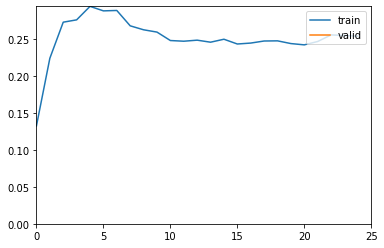

epoch,train_loss,valid_loss,accuracy,time
0,0.259088,0.181640,0.927361,00:22
1,0.260959,0.320060,0.871671,00:22
2,0.270913,0.427486,0.859564,00:21
3,0.260912,0.327159,0.876513,00:22
4,0.226215,0.304267,0.881356,00:22
5,0.183552,0.306112,0.876513,00:21
6,0.159495,0.304414,0.883777,00:21


Better model found at epoch 0 with accuracy value: 0.9273607730865479.


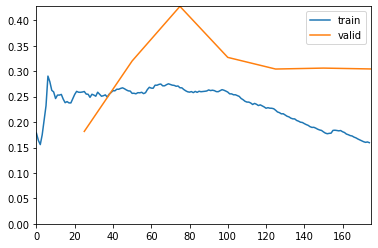

In [ ]:
learn=vision_learner(get_dls(160, 64), model, metrics=accuracy).load('r5')
learn.fine_tune(7, 0.005, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])

In [ ]:
learn.save('r6')

Path('models/r6.pth')

              precision    recall  f1-score   support

     Igneous       0.79      0.82      0.80        40
 Metamorphic       0.93      0.95      0.94       163
 Sedimentary       0.96      0.93      0.94       210

    accuracy                           0.93       413
   macro avg       0.89      0.90      0.90       413
weighted avg       0.93      0.93      0.93       413



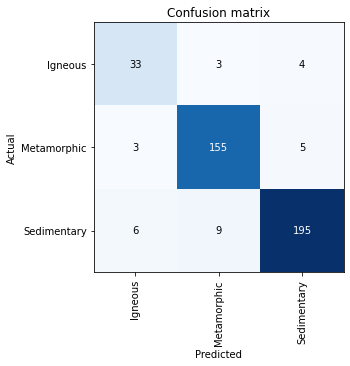

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize(5,5))
interp.print_classification_report()

In [ ]:
learn.export('/content/content/MyDrive/models/resnet18-1')

# VGG19, accuracy = 87%




In [ ]:
def get_dls(size, bs):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(200),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.66),
                               Normalize])
    return dblock.dataloaders(path, bs=bs)

epoch,train_loss,valid_loss,accuracy,time
0,1.523574,1.295178,0.602906,09:01


Better model found at epoch 0 with accuracy value: 0.6029055714607239.


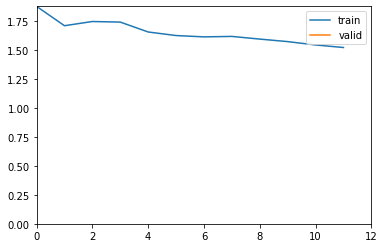

epoch,train_loss,valid_loss,accuracy,time
0,1.006612,0.851662,0.728814,13:04
1,0.793285,0.907191,0.755448,13:00
2,0.659027,1.412748,0.673123,12:56
3,0.559275,0.610219,0.806295,12:53
4,0.467439,0.533083,0.818402,13:01
5,0.403161,0.564106,0.813559,12:57


Better model found at epoch 0 with accuracy value: 0.7288135886192322.


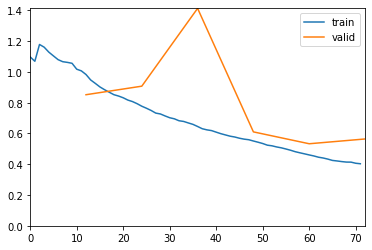

Better model found at epoch 1 with accuracy value: 0.7554479241371155.
Better model found at epoch 3 with accuracy value: 0.8062953948974609.
Better model found at epoch 4 with accuracy value: 0.8184019327163696.


Path('models/v1.pth')

In [ ]:
model = vgg19_bn
learn=vision_learner(get_dls(100, 128), model, metrics=accuracy)
learn.fine_tune(6, 0.02, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('v1')

epoch,train_loss,valid_loss,accuracy,time
0,0.311161,0.365610,0.857143,17:19


Better model found at epoch 0 with accuracy value: 0.8571428656578064.


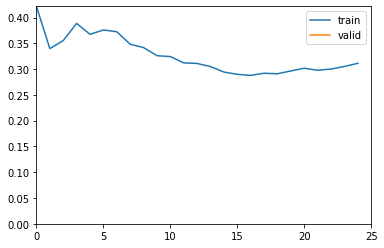

epoch,train_loss,valid_loss,accuracy,time
0,0.369425,0.484989,0.842615,25:15
1,0.415609,1.791797,0.670702,25:10
2,0.423952,0.428083,0.823245,25:24
3,0.343769,0.355007,0.852300,25:13


Better model found at epoch 0 with accuracy value: 0.842615008354187.


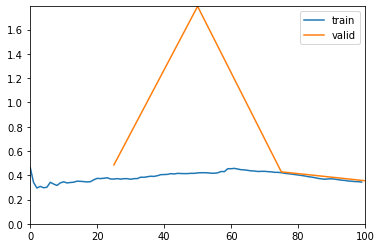

Better model found at epoch 3 with accuracy value: 0.852300226688385.


Path('models/v2.pth')

In [ ]:
learn=vision_learner(get_dls(140, 64), model, metrics=accuracy).load('v1')
learn.fine_tune(4, 0.01, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('v2')

epoch,train_loss,valid_loss,accuracy,time
0,0.369338,0.242804,0.912833,29:21


Better model found at epoch 0 with accuracy value: 0.9128329157829285.


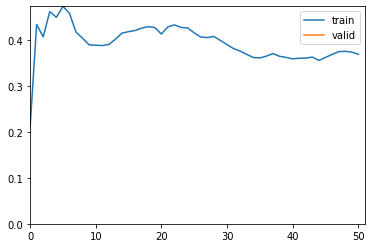

epoch,train_loss,valid_loss,accuracy,time
0,0.412925,0.553887,0.820823,42:44
1,0.359142,0.335387,0.871671,42:33


Better model found at epoch 0 with accuracy value: 0.8208232522010803.


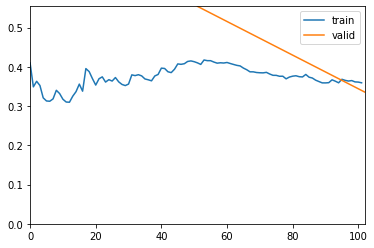

Better model found at epoch 1 with accuracy value: 0.8716707229614258.


Path('models/v3.pth')

In [ ]:
learn=vision_learner(get_dls(180, 32), model, metrics=accuracy).load('v2')
learn.fine_tune(2, 0.005, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('v3')

              precision    recall  f1-score   support

     Igneous       0.66      0.62      0.64        37
 Metamorphic       0.90      0.91      0.90       159
 Sedimentary       0.89      0.89      0.89       217

    accuracy                           0.87       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.87      0.87      0.87       413



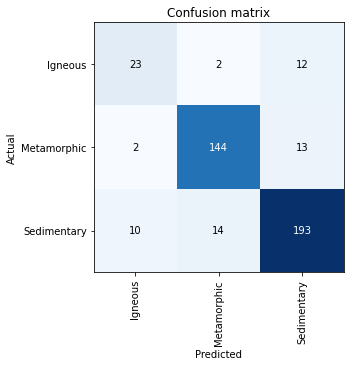

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize(5,5))
interp.print_classification_report()

In [ ]:
learn.export('/content/content/MyDrive/models/vgg19-1')

#Densenet, accuracy = 90%

In [ ]:
def get_dls(size, bs):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(200),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.8),
                               Normalize])
    return dblock.dataloaders(path, bs=bs)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.363597,0.698389,0.762712,05:37


Better model found at epoch 0 with accuracy value: 0.7627118825912476.


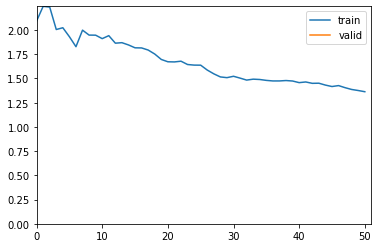

epoch,train_loss,valid_loss,accuracy,time
0,1.048596,11.153187,0.697337,00:34
1,0.720902,0.505412,0.794189,00:35


Better model found at epoch 0 with accuracy value: 0.6973365545272827.


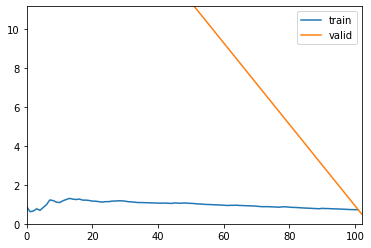

Better model found at epoch 1 with accuracy value: 0.7941888570785522.


Path('models/dn1.pth')

In [ ]:
from torchvision.models.densenet import DenseNet
model = densenet201
learn = vision_learner(get_dls(150, 32), model, metrics=accuracy)
learn.fine_tune(2, 0.03, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('dn1')

epoch,train_loss,valid_loss,accuracy,time
0,0.577590,0.681916,0.832930,00:40


Better model found at epoch 0 with accuracy value: 0.832929790019989.


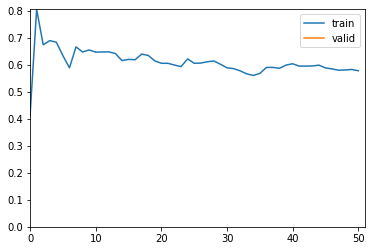

epoch,train_loss,valid_loss,accuracy,time
0,0.468792,0.505584,0.815981,00:39
1,0.566346,6.533536,0.765133,00:40
2,0.468970,0.428611,0.849879,00:38
3,0.378313,0.492996,0.861985,00:38


Better model found at epoch 0 with accuracy value: 0.8159806132316589.


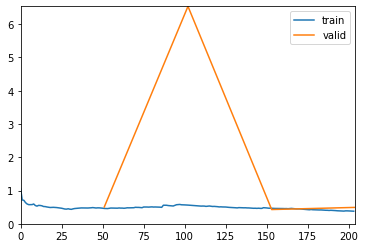

Better model found at epoch 2 with accuracy value: 0.8498789072036743.
Better model found at epoch 3 with accuracy value: 0.861985445022583.


Path('models/dn2.pth')

In [ ]:
learn = vision_learner(get_dls(190, 32), model, metrics=accuracy).load('dn1')
learn.fine_tune(4, 0.009, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('dn2')

epoch,train_loss,valid_loss,accuracy,time
0,0.349476,0.277531,0.898305,00:33


Better model found at epoch 0 with accuracy value: 0.8983050584793091.


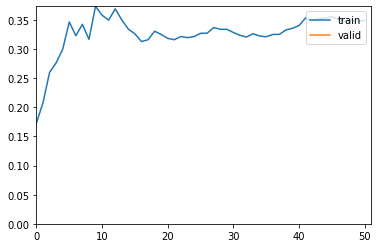

epoch,train_loss,valid_loss,accuracy,time
0,0.376913,0.249146,0.905569,00:38
1,0.344753,0.286079,0.893462,00:38


Better model found at epoch 0 with accuracy value: 0.9055690169334412.


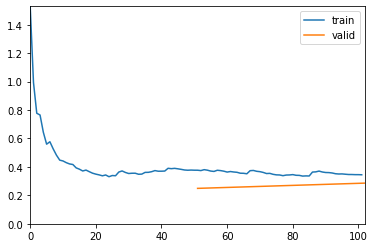

Path('models/dn3.pth')

In [ ]:
learn = vision_learner(get_dls(190, 32), model, metrics=accuracy, wd_bn_bias=True).load('dn2')
learn.fine_tune(2, 0.004, cbs=[ShowGraphCallback, SaveModelCallback('accuracy')])
learn.save('dn3')

In [ ]:
learn.export('/content/content/MyDrive/models/densenet-1')


# Alexnet

# vgg11

# Test run

In [ ]:
print (f"num of test images: {len(imgs)}")

num of test images: 45


In [ ]:
def testRun(trained):
  t_dict = {'Igneous':[0,0,0,0], 'Metamorphic': [0,0,0,0], 'Sedimentary':[0,0,0,0]} # [correct_t, incorrect_t, correct_ut, incorrect_ut]
  trained_subtypes = ["basalt", "granite", "limestone", "sandstone", "coal", "marble", "quartzite"]

  for i in test_data:
    pre,x,pro = trained.predict(i[0])

    if pre == i[1]: # correct pred
      if i[2] in trained_subtypes:
        t_dict[i[1]][0] +=1
      else:
        t_dict[i[1]][2] +=1

    else: # incorrect pred
      if i[2] in trained_subtypes:
        t_dict[i[1]][1] +=1
      else:
        t_dict[i[1]][3] +=1

  t_s = sum(sum(l) for l in t_dict.values()) # total size of test set
  c_t = sum(l[0] for l in t_dict.values()) # total correct_t
  c_ut = sum(l[2] for l in t_dict.values()) # total correct_ut
  ic_t = sum(l[1] for l in t_dict.values()) # totall incorrect_t
  ic_ut = sum(l[3] for l in t_dict.values()) # total incorrect ut

  if c_t == 0:
    c_t = 1 
  if c_ut == 0:
    c_ut = 1
  if ic_ut == 0:
    ic_ut = 1 

  output = f"\n overall accuracy: {(c_t+c_ut)/t_s}"
  output += f"\n  acc_trained: {c_t/(c_t+ic_t)}"
  output += f"\n  acc_untrained: {c_ut/(c_ut+ic_ut)}"

  return output

In [ ]:
my_vgg = load_learner('/content/content/MyDrive/models/vgg19-1')
my_res = load_learner('/content/content/MyDrive/models/resnet18-1')
my_goog = load_learner('/content/content/MyDrive/models/googlenet-1')
my_den = load_learner('/content/content/MyDrive/models/densenet-1')
#my_alex = load_learner('/content/content/MyDrive/models/alexnet-1')
#my_vgg2 = load_learner('/content/content/MyDrive/models/vgg11-1')

In [ ]:
print(f"\nvgg results: {testRun(my_vgg)} \n-------------------")
print(f"\nresnet results: {testRun(my_res)} \n-------------------")
print(f"\ngooglenet results: {testRun(my_goog)} \n-------------------")
print(f"\ndensenet results: {testRun(my_den)} \n-------------------")
#print(f"\nalexnetnet results: {testRun(my_alex)} \n-------------------")
#print(f"\nvgg11 results: {testRun(my_vgg2)} \n-------------------")


vgg results: 
 overall accuracy: 0.4666666666666667
  acc_trained: 0.4666666666666667
  acc_untrained: 0.4666666666666667 
-------------------



resnet results: 
 overall accuracy: 0.5555555555555556
  acc_trained: 0.4666666666666667
  acc_untrained: 0.7333333333333333 
-------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"



googlenet results: 
 overall accuracy: 0.5555555555555556
  acc_trained: 0.5333333333333333
  acc_untrained: 0.6 
-------------------



densenet results: 
 overall accuracy: 0.5111111111111111
  acc_trained: 0.4666666666666667
  acc_untrained: 0.6 
-------------------


In [ ]:
def singleTest(img, model):
  CorrectCheck,_,probs = my_vgg.predict(img)
  output = (f"\n  probalibities:{probs}")
  output +=(f"\n  predicted type: {CorrectCheck}.")
  output +=(f"\n  actual type: {str(test_image_pth).split('/')[5]}. \n")
  return output

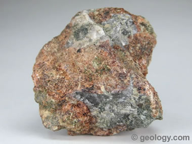

In [ ]:
test_image_pth = imgs[10]   # change the number here to pick different test pictures
img = PILImage.create(test_image_pth)
img.to_thumb(192)

In [ ]:
CorrectCheck,_,probs = my_vgg.predict(img)

print(f"\nvgg19 results: {singleTest(img, my_vgg)} \n-------------------")
print(f"\nresnet18 results: {singleTest(img, my_res)} \n-------------------")
print(f"\ngooglenet results: {singleTest(img, my_goog)} \n-------------------")
print(f"\ndensenet results: {singleTest(img, my_den)} \n-------------------")
#print(f"\nalexnetnet results: {singleTest(my_alex)} \n-------------------")
#print(f"\nvgg11 results: {singleTest(my_vgg2)} \n-------------------")


vgg19 results: 
  probalibities:TensorBase([0.4138, 0.5074, 0.0789])
  predicted type: Metamorphic.
  actual type: Metamorphic. 
 
-------------------



resnet18 results: 
  probalibities:TensorBase([0.4138, 0.5074, 0.0789])
  predicted type: Metamorphic.
  actual type: Metamorphic. 
 
-------------------



googlenet results: 
  probalibities:TensorBase([0.4138, 0.5074, 0.0789])
  predicted type: Metamorphic.
  actual type: Metamorphic. 
 
-------------------



densenet results: 
  probalibities:TensorBase([0.4138, 0.5074, 0.0789])
  predicted type: Metamorphic.
  actual type: Metamorphic. 
 
-------------------
